<a href="https://colab.research.google.com/github/aanchan1/glass-identification-using-knn/blob/main/glass_identification_using_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from scipy.spatial import distance
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv("glass_data.csv")
df.head()

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
df.Type_of_glass.value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type_of_glass, dtype: int64

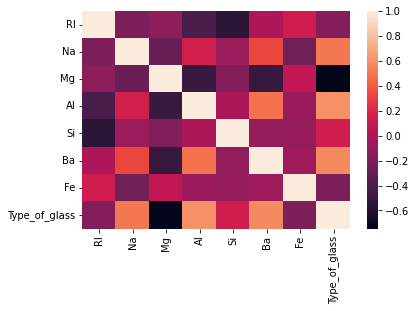

In [4]:
df=df.drop('ID',axis=1)
df=df.drop('Ca',axis=1)
df=df.drop('K',axis=1)
cor = df.corr()
sns.heatmap(cor)

ID has no effect on type of glass hence it can be dropped.
Ca and K doesnot affect type that much.
Also Ca and RI are highly correlated, this means using only RI is enough.
So we can go ahead and drop Ca, and also K.(performed later)


Feature scaling

In [5]:
X=df.iloc[:,:9]
print(X.shape)
y=df.iloc[:,-1].values
print(y.shape)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)


(214, 8)
(214,)
(149, 8) (65, 8) (149,) (65,)


In [6]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [7]:

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'manhattan', p = 2)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.89      0.89      0.89        19
           2       0.93      0.89      0.91        28
           3       1.00      1.00      1.00         2
           5       0.50      1.00      0.67         2
           6       1.00      0.50      0.67         2
           7       1.00      1.00      1.00        12

    accuracy                           0.91        65
   macro avg       0.89      0.88      0.86        65
weighted avg       0.92      0.91      0.91        65



In [8]:
accuracy_score(y_test,y_pred)


0.9076923076923077

In [9]:
k_range = range(1,100,2)
k_scores = []
error_rate =[]
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    #kscores - accuracy
    scores = cross_val_score(knn,df,df['Type_of_glass'],cv=5,scoring='accuracy')
    k_scores.append(scores.mean())
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    error_rate.append(np.mean(y_pred!=y_test))
k_values=k_range[k_scores.index(max(k_scores))]
kk=k_range[error_rate.index(min(error_rate))]
#print('optimal k value is',k_values)
print('optimal k value is',kk)

optimal k value is 1


In [10]:
knn = KNeighborsClassifier(n_neighbors=kk,metric='manhattan')
knn.fit(X_train,y_train)
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=k_values, p=2,
                     weights='uniform')
y_pred = knn.predict(X_test)
accuracy_score(y_test,y_pred)


0.9538461538461539

In [11]:
knn = KNeighborsClassifier(n_neighbors=k_values,metric='euclidean')
knn.fit(X_train,y_train)
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=k_values, p=2,
                     weights='uniform')
y_pred = knn.predict(X_test)
accuracy_score(y_test,y_pred)

0.8769230769230769

In [12]:
from sklearn.metrics import precision_score
print("Precision: {0}".format(precision_score(y_test, knn.predict(X_test),average='micro')))
from sklearn.metrics import recall_score
print("Recall:", round(recall_score(y_test, knn.predict(X_test),average='micro'), 2))
from sklearn.metrics import roc_auc_score,accuracy_score
print('auroc',roc_auc_score(y_test, knn.predict_proba(X_test),multi_class='ovr'))
print("Accuracy:",accuracy_score(y_test, y_pred))

Precision: 0.8769230769230769
Recall: 0.88
auroc 0.9817098276766468
Accuracy: 0.8769230769230769
